In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

# Get Data and Glimpse

In [11]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')
df.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-Tudor castle he tried to hide behind 40ft hay bales,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-Ukraine Border",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town met with resistance [video],False,JoeyRamone63,worldnews


In [13]:
df.nunique()

time_created    508329
date_created      3223
up_votes          5782
down_votes           1
title           500720
over_18              2
author           85838
category             1
dtype: int64

**Observations:** 
- `time_created`, `down_votes`, and `category` don't have any information in this portion of the dataset, so they can be removed
- `date_created` can be split into year, month, and day for more in-depth analysis
- there are some repeating `title`'s (~8500)

## Clean the Dataset

In [14]:
df = df.drop(columns=['time_created','down_votes','category'])
df.head()

,date_created,up_votes,title,over_18,author
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [15]:
df['date_created']= pd.to_datetime(df['date_created'])
df['year'] = df['date_created'].dt.year
df['month'] = df['date_created'].dt.month
df['day'] = df['date_created'].dt.day
df.head()

,date_created,up_votes,title,over_18,author,year,month,day
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,1,25
1,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,1,25
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,1,25
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,1,25
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,1,25


# Data Exploration and Wrangling

What I would like to know:
- what article(s) has the most up votes
- what are the repetitive titles
- what authors have the most number of up votes
- what authors post the most
- do over 18 articles have more up votes in general
- what are the trends over years, months, days with topic, up votes (NLP)
- what topics are most interesting/up voted (NLP)
- what topics do authors write about (NLP)

## Most Clicked

In [17]:
df.up_votes.describe()

count    509236.000000
mean        112.236283
std         541.694675
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [19]:
# what got so many upvotes? -- ohh I think I've read this one
df[df.up_votes == 21253].loc[:,['date_created','title','author']]

,date_created,title,author
377200,2015-06-20,"A biotech startup has managed to 3-D print fake rhino horns that carry the same genetic fingerprint as the actual horn. The company plans to flood Chinese rhino horn market at one-eighth of the price of the original, undercutting the price poachers can get and forcing them out eventually.",KRISHNA53


## Repeating Titles

In [20]:
rep_titles = pd.DataFrame(df.title.value_counts()).rename(columns={'title':'n_posts'})
rep_titles.head(10)

,n_posts
Brutality of Syrian Rebels Posing Dilemma in West,6
The Marshall Islands Are Disappearing,5
New SARS-like virus is a threat to the entire world,5
Ex-Blackwater Guards Sentenced to Prison in 2007 Killings of Iraqi Civilians,5
"Congo declares yellow fever epidemic, 1,000 suspected cases",5
Samsung Galaxy Note 3 Leaked camera image,5
Hungarian nationalist TV camera operator filmed kicking refugee children,5
China disrupts Google services ahead of Tiananmen anniversary,5
Syria Militants Said to Recruit Visiting Americans to Attack U.S.,5
Obama Administration Ends Pentagon Program to Train Syrian Rebels,5


In [22]:
df[df['title'] == rep_titles.first_valid_index()]\
    .loc[:,['date_created','author','up_votes','over_18']]\
    .sort_values(by='up_votes', ascending=False)

,date_created,author,up_votes,over_18
210806,2013-09-06,BillTowne,57,False
210805,2013-09-06,GreyMatter22,31,False
210632,2013-09-05,0x0E,28,False
210607,2013-09-05,Jewpiter,19,False
210720,2013-09-05,erowidtrance,12,False
210685,2013-09-05,emr1028,7,False


## Top Authors

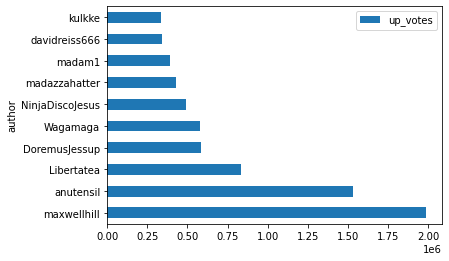

In [23]:
top_authors = pd.DataFrame(df.groupby('author')['up_votes'].sum())\
    .sort_values(by='up_votes', ascending=False)

top_authors.head(10).plot.barh()

## Busiest Authors

In [24]:
df.author.value_counts().describe()

count    85838.000000
mean         5.932524
std         62.282937
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       8897.000000
Name: author, dtype: float64

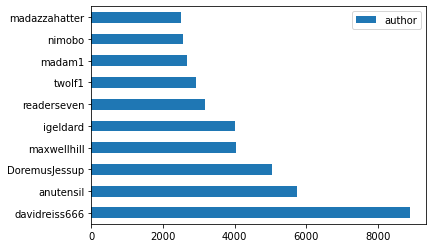

In [25]:
n_posts = pd.DataFrame(df.author.value_counts())

n_posts.head(10).plot.barh()

## NSFW vs SFW

In [26]:
df.over_18.value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [27]:
df_nsfw = df[df['over_18'] == True].loc[:,'up_votes']
print(f'mean up votes: {df_nsfw.mean():5.3f}')
print(f'standard dev: {df_nsfw.std():5.3f}')

mean up votes: 380.375
standard dev: 1062.401


In [28]:
df_sfw = df[df['over_18'] == False].loc[:,'up_votes']
print(f'mean up votes: {df_sfw.mean():5.3f}')
print(f'standard dev:  {df_sfw.std():5.3f}')

mean up votes: 112.068
standard dev:  541.170


In [29]:
df[df.over_18 == True]\
    .loc[:,['date_created','up_votes','title','author']]\
    .sort_values(by='up_votes', ascending=False)

,date_created,up_votes,title,author
500590,2016-10-18,7941,"Judge presiding over El Chapo s case shot, killed while jogging outside home",IsleCook
494536,2016-09-25,6322,"[NSFL] Australian child molester Peter Scully faces death penalty in Philippines - Scully filmed his torture and rape of young girls as he made them dig their own graves and laughed, joked and acted nonchalant about his alleged crimes",ExWhySaid
428689,2016-01-07,5878,Armed suspect shot dead after trying to storm Paris police station,rawmas02
462067,2016-05-17,5617,Syria Army killed over 200 ISIS militants in 3-day long offensive in Deir Ezzor,orangeflower2015
303900,2014-09-05,5507,Man escapes ISIS execution,brothamo
...,...,...,...,...
310427,2014-09-28,0,Video: GRAPHIC: Mexican Terrorist Cartel Beheads 4 Women In Message To America | Prepper Chimp,schill_ya_later
301046,2014-08-27,0,Egyptian Feminists Literally Shit and Bleed on ISIS Flag (NSFW),CratusRedditus
168527,2013-03-26,0,Fine Gael split over threesome advice,Aron_Sam
289329,2014-07-17,0,Japanese woman faces two years in prison for trying to 3D scan her vagina for a special kind of kyak design. mildly nsfw.,space_jumper
